In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', 300)

In [102]:
train_full = pd.read_csv('./datasets/kaggle-house-prices-train.csv')
kaggle = pd.read_csv('./datasets/kaggle-house-prices-test.csv', header=0)

Nous choisissons la feature "Neighborhood" en sus de la variable "Surface" <br />
On crée la variable "Surface":

In [103]:
train_full['Surface'] = train_full['TotalBsmtSF'] + train_full['GrLivArea']
kaggle['Surface'] = kaggle['TotalBsmtSF'] + kaggle['GrLivArea']

On élimine les lignes avec des vameurs manquantes pour "Neighborhood"

In [104]:
train_full = train_full.dropna(subset=['Neighborhood'])
kaggle = kaggle.dropna(subset=['Neighborhood'])
train_full = train_full.fillna(0)
kaggle = kaggle.fillna(0)

In [8]:
# On plot le prix en fonction de la surface totale en colorant par "Neighborhood"

import seaborn as sns

In [9]:
sns.scatterplot(x=train_full['Surface'],
                y=train_full['SalePrice'], hue=train_full['Neighborhood'])

<IPython.core.display.Javascript object>

Suite au scatterplot, on choisi de supprimer les données dont la surface est supérieure à 7000

In [105]:
kept_surface = train_full['Surface'] < 7000
# train_full = train_full[kept_surface][['SalePrice', 'GrLivArea', 'Surface', 'Neighborhood']]
train_full = train_full[kept_surface]

Pour intégrer les variables catégorielles, on peut les "séparer" en autant de colones que de catégorie par variables remplies par des `0` si la catégrie ne match pas et `1` si la catégorie match... <br />
fonction `get_dummies` de Pandas

In [106]:
train_full_save = pd.DataFrame()
train_full_save['Neighborhood'] = train_full['Neighborhood']
kaggle_save = pd.DataFrame()
kaggle_save['Neighborhood'] = kaggle['Neighborhood']
# train_full = pd.get_dummies(train_full, columns=['Neighborhood'])
train_full = pd.get_dummies(train_full)
train_full['Neighborhood'] = train_full_save['Neighborhood']
kaggle = pd.get_dummies(kaggle)
kaggle['Neighborhood'] = kaggle_save['Neighborhood']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# X_train, X_test, y_train, y_test = train_test_split(
#     train_full.iloc[:,1:], train_full['SalePrice'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    train_full, train_full['SalePrice'], test_size=0.2, random_state=13)

In [109]:
def calc_SmPrice(row):
    row['SmPrice'] = row['SalePrice']/row['GrLivArea']
    return row['SmPrice']

def get_SmPrice(df):
    nb_sm_prices = dict()
    for nb in df.Neighborhood.unique():
        rows = df.loc[df['Neighborhood']==nb]
        rows['SmPrice'] = rows.apply(calc_SmPrice, axis=1)
        nb_sm_prices.update({str(nb): rows['SmPrice'].mean().astype(np.int64)})
    return nb_sm_prices

def set_NbSmPrice(row):
    row['NbSmPrice'] = smprices.get(row['Neighborhood'])
    return row['NbSmPrice']

In [15]:
# def calc_SmPrice(row):
#     row['SmPrice'] = row['SalePrice']/row['GrLivArea']
#     return row['SmPrice']

# def get_SmPrice(df):
#     nb_sm_prices = {nb:0 for nb in train_full.Neighborhood.unique()}
#     for nb in df.Neighborhood.unique():
#         rows = df.loc[df['Neighborhood']==nb]
#         rows['SmPrice'] = rows.apply(calc_SmPrice, axis=1)
#         nb_sm_prices.update({str(nb): rows['SmPrice'].mean().astype(np.int64)})
#     return nb_sm_prices

# def set_NbSmPrice(row):
#     row['NbSmPrice'] = smprices.get(row['Neighborhood'])
#     return row['NbSmPrice']

# nb_sm_prices = {}
# nb_sm_prices

In [110]:
smprices = get_SmPrice(X_train)
X_train['NbSmPrice'] = X_train.apply(set_NbSmPrice, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
X_test['NbSmPrice'] = X_test.apply(set_NbSmPrice, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
kaggle['NbSmPrice'] = kaggle.apply(set_NbSmPrice, axis=1)

In [112]:
X_train = X_train.drop(['SalePrice', 'Neighborhood'], axis=1)

In [113]:
X_test = X_test.drop(['SalePrice', 'Neighborhood'], axis=1)

In [114]:
# X_train.to_csv('./datasets/x_train_formatted.csv', index=False)
# X_test.to_csv('./datasets/x_test_formatted.csv', index=False)

In [115]:
# y_train.to_csv('./datasets/y_train.csv', index=False)
# y_test.to_csv('./datasets/y_test.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [21]:
kaggle = kaggle.drop(['Neighborhood'], axis=1)


In [82]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [83]:
from tensorflow.keras.layers import Input
model.add(Input(shape=X_train.shape[1]))

In [84]:
from tensorflow.keras.layers import Dense
model.add(Dense(X_train.shape[1]*4, activation='relu'))
model.add(Dense(X_train.shape[1]*3, activation='relu'))
model.add(Dense(X_train.shape[1]*2, activation='relu'))
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(1))

In [85]:
from tensorflow.keras.optimizers import Adam
LEARNING_RATE = 0.001
model.compile(loss='mse', optimizer=Adam(lr=LEARNING_RATE))

In [93]:
missing_col = list(set(X_train.columns) - set(kaggle.columns))

for col in missing_col:
    kaggle[col] = 0
kaggle = kaggle[X_train.columns]

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [60]:
X_test = scaler.transform(X_test)

In [95]:
kaggle = scaler.transform(kaggle)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [96]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_scaler = StandardScaler()
y_train_log = np.array(y_train_log).reshape(-1, 1)
y_test_log = np.array(y_test_log).reshape(-1, 1)

In [97]:
y_scaler.fit(y_train_log)
y_train_log_scaled = y_scaler.transform(y_train_log)
y_test_log_scaled = y_scaler.transform(y_test_log)

In [86]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 400 # how many iterations over the whole dataset
history = model.fit(X_train, y_train_log_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/400
1166/1166 [==============================] - 1s 949us/sample - loss: 0.8986
Epoch 2/400
1166/1166 [==============================] - 0s 269us/sample - loss: 0.7229
Epoch 3/400
1166/1166 [==============================] - 0s 244us/sample - loss: 8.2407
Epoch 4/400
1166/1166 [==============================] - 0s 240us/sample - loss: 0.3247
Epoch 5/400
1166/1166 [==============================] - 0s 238us/sample - loss: 1.2119
Epoch 6/400
1166/1166 [==============================] - 0s 244us/sample - loss: 1.2477
Epoch 7/400
1166/1166 [==============================] - 0s 252us/sample - loss: 0.7415
Epoch 8/400
1166/1166 [==============================] - 0s 257us/sample - loss: 0.4799
Epoch 9/400
1166/1166 [==============================] - 0s 252us/sample - loss: 0.4675
Epoch 10/400
1166/1166 [==============================] - 0s 284us/sample - loss: 0.3456
Epoch 11/400
1166/1166 [==============================] - 0s 232us/sample - loss: 0.1666
Epoch 12/400
1166/1166 [======

Epoch 94/400
1166/1166 [==============================] - 0s 276us/sample - loss: 0.0048
Epoch 95/400
1166/1166 [==============================] - 0s 251us/sample - loss: 0.0046
Epoch 96/400
1166/1166 [==============================] - 0s 270us/sample - loss: 0.0045
Epoch 97/400
1166/1166 [==============================] - 0s 294us/sample - loss: 0.0043
Epoch 98/400
1166/1166 [==============================] - 0s 241us/sample - loss: 0.0042
Epoch 99/400
1166/1166 [==============================] - 0s 289us/sample - loss: 0.0040
Epoch 100/400
1166/1166 [==============================] - 0s 282us/sample - loss: 0.0039
Epoch 101/400
1166/1166 [==============================] - 0s 310us/sample - loss: 0.0038
Epoch 102/400
1166/1166 [==============================] - 0s 298us/sample - loss: 0.0037
Epoch 103/400
1166/1166 [==============================] - 0s 275us/sample - loss: 0.0036
Epoch 104/400
1166/1166 [==============================] - 0s 270us/sample - loss: 0.0034
Epoch 105/400
11

Epoch 184/400
1166/1166 [==============================] - 0s 244us/sample - loss: 2.3272e-04
Epoch 185/400
1166/1166 [==============================] - 0s 244us/sample - loss: 2.2257e-04
Epoch 186/400
1166/1166 [==============================] - 0s 225us/sample - loss: 2.1901e-04
Epoch 187/400
1166/1166 [==============================] - 0s 250us/sample - loss: 2.1808e-04
Epoch 188/400
1166/1166 [==============================] - 0s 262us/sample - loss: 2.1912e-04
Epoch 189/400
1166/1166 [==============================] - 0s 252us/sample - loss: 2.1949e-04
Epoch 190/400
1166/1166 [==============================] - 0s 249us/sample - loss: 2.1355e-04
Epoch 191/400
1166/1166 [==============================] - 0s 266us/sample - loss: 2.0504e-04
Epoch 192/400
1166/1166 [==============================] - 0s 264us/sample - loss: 1.9516e-04
Epoch 193/400
1166/1166 [==============================] - 0s 246us/sample - loss: 1.8742e-04
Epoch 194/400
1166/1166 [==============================] - 0

Epoch 272/400
1166/1166 [==============================] - 0s 240us/sample - loss: 4.2265e-05
Epoch 273/400
1166/1166 [==============================] - 0s 229us/sample - loss: 5.3519e-05
Epoch 274/400
1166/1166 [==============================] - 0s 244us/sample - loss: 7.3525e-05
Epoch 275/400
1166/1166 [==============================] - 0s 264us/sample - loss: 1.0620e-04
Epoch 276/400
1166/1166 [==============================] - 0s 266us/sample - loss: 1.6508e-04
Epoch 277/400
1166/1166 [==============================] - 0s 237us/sample - loss: 2.5707e-04
Epoch 278/400
1166/1166 [==============================] - 0s 231us/sample - loss: 4.1462e-04
Epoch 279/400
1166/1166 [==============================] - 0s 267us/sample - loss: 6.1847e-04
Epoch 280/400
1166/1166 [==============================] - 0s 249us/sample - loss: 8.8969e-04
Epoch 281/400
1166/1166 [==============================] - 0s 252us/sample - loss: 0.0010
Epoch 282/400
1166/1166 [==============================] - 0s 24

Epoch 360/400
1166/1166 [==============================] - 0s 226us/sample - loss: 0.0032
Epoch 361/400
1166/1166 [==============================] - 0s 237us/sample - loss: 0.0026
Epoch 362/400
1166/1166 [==============================] - 0s 238us/sample - loss: 0.0013
Epoch 363/400
1166/1166 [==============================] - 0s 222us/sample - loss: 1.8476e-04
Epoch 364/400
1166/1166 [==============================] - 0s 275us/sample - loss: 2.7321e-04
Epoch 365/400
1166/1166 [==============================] - 0s 267us/sample - loss: 0.0011
Epoch 366/400
1166/1166 [==============================] - 0s 227us/sample - loss: 0.0014
Epoch 367/400
1166/1166 [==============================] - 0s 235us/sample - loss: 8.4338e-04
Epoch 368/400
1166/1166 [==============================] - 0s 243us/sample - loss: 1.4727e-04
Epoch 369/400
1166/1166 [==============================] - 0s 249us/sample - loss: 1.5240e-04
Epoch 370/400
1166/1166 [==============================] - 0s 221us/sample - los

In [87]:
y_predict = model.predict(X_test)


In [98]:
y_predict = model.predict(kaggle)

<IPython.core.display.Javascript object>


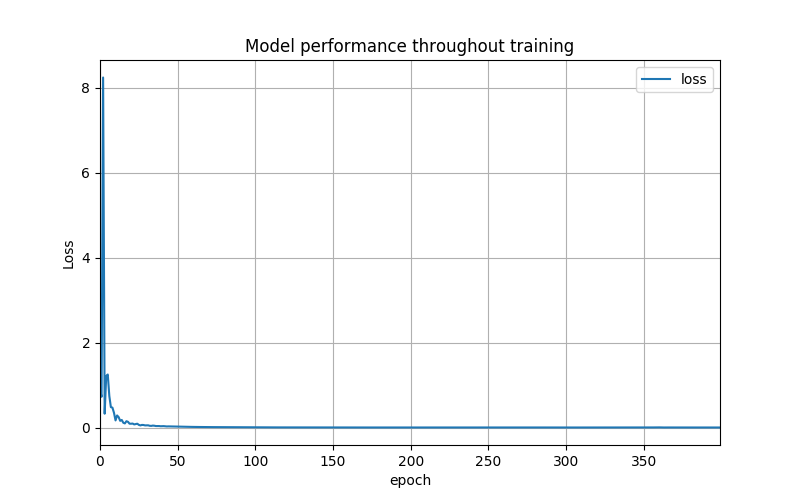

RMSLE :  0.1266212061131304
MAE :  14484.213291952055


In [88]:
y_predict_rescaled = np.exp(y_scaler.inverse_transform(y_predict))

from matplotlib import pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

import numpy as np
from sklearn import metrics

print('RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_test, y_predict_rescaled)))
print('MAE : ', metrics.mean_absolute_error(y_test, y_predict_rescaled))

In [99]:
sub = pd.DataFrame()
ids = [i+1461 for i in range(1459)]
sub['Id'] = ids

In [100]:
sub['SalePrice'] = np.exp(y_scaler.inverse_transform(y_predict))

In [ ]:
y_predict.shape

In [101]:
sub.to_csv('subsub.csv', index=False)

In [ ]:
# sub.head(5)